<a href="https://colab.research.google.com/github/JuanCarlosUNAL/Notebooks/blob/master/tf/eagerExecutionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network with eager execution

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
print(tf.executing_eagerly())

True


## Configure Minst dataset

11493376/11490434 [==============================] - 0s 0us/step


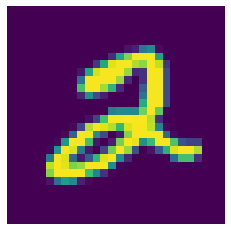

In [2]:
dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()
x_train, x_test = x_train.reshape(-1, 28*28), x_test.reshape(-1, 28*28)
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)
y_train, y_test = y_train.reshape(-1, 10), y_test.reshape(-1, 10)
y_train, y_test = y_train/255, y_test/255
y_train, y_test = tf.constant(y_train), tf.constant(y_test)

plt.imshow(x_train[5].reshape(28, 28))
plt.axis('off')
plt.show()

In [3]:
x_batch, y_batch = x_train[:1000], y_train[:1000]

## Logistic regresion

In [4]:
input = 28 * 28
output = 10
w = tf.Variable(tf.random.normal((input, output), stddev=1e-4))
b = tf.Variable(tf.zeros(output, 1))

In [5]:
lr = 1e-2
loss_history = []
for _ in range(400):
  with tf.GradientTape(persistent=True) as tape:
    z = x_batch @ w + b
    a = tf.nn.sigmoid(z)

    loss = tf.math.reduce_mean(tf.losses.categorical_crossentropy(y_batch, a));
  loss_history.append(loss)

  dw = tape.gradient(loss, w)
  db = tape.gradient(loss, b)

  w.assign(w - lr * dw)
  b.assign(b - lr * db)

print(f'''
  loss: {loss:.6}
  expected: {y_batch[100].numpy().argmax()}
  result: {a[100].numpy().argmax()}
''')


  loss: 9.69532e-05
  expected: 5
  result: 5



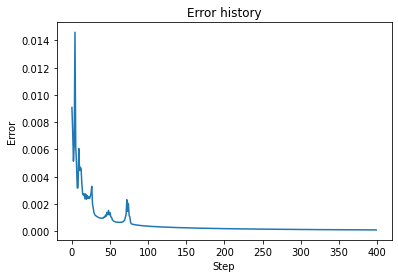

In [6]:
plt.plot(loss_history)
plt.title('Error history')
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

In [7]:
results = a.numpy().argmax(axis=1)
expect = y_batch.numpy().argmax(axis=1)

acc = (expect == results).astype(np.int16).sum() / 10
print(f'accuracy is {acc}%')

accuracy is 100.0%


## Implement NN

In [53]:
layer_config = [28*28, 100, 30, 10]
W = [ tf.Variable(tf.random.normal(shape=(y,x), stddev=1e-5)) for x, y in zip(layer_config[1:], layer_config[:-1])]
B = [ tf.Variable(tf.zeros((x,))) for x in layer_config[1:]]
loss_history = []

In [45]:
opt = tf.optimizers.Adam()

In [60]:
for _ in range(500):
  a = x_batch
  with tf.GradientTape(persistent=True) as tape:
    for w, b in zip(W, B):
      z = a @ w + b
      a = tf.nn.sigmoid(z)
    loss = tf.losses.categorical_crossentropy(y_batch, a)
    loss = tf.math.reduce_mean(loss)
  loss_history.append(loss)

  dW = tape.gradient(loss, W)
  dB = tape.gradient(loss, B)

  opt.apply_gradients(zip([*dW, *dB], [*W, *B]))

print(f'''
  loss: {loss:.6}
  expected: {y_batch[100].numpy().argmax()}
  result: {a[100].numpy().argmax()}
''')


  loss: 0.00019588
  expected: 5
  result: 5



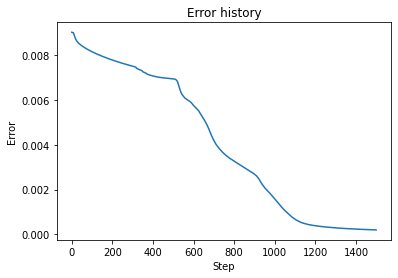

In [61]:
plt.plot(loss_history)
plt.title('Error history')
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

In [62]:
results = a.numpy().argmax(axis=1)
expect = y_batch.numpy().argmax(axis=1)

acc = (expect == results).astype(np.int16).sum() / 10
print(f'accuracy is {acc}%')

accuracy is 99.2%
